## Macromolecules : Binding Affinity

LAST REVISED: July 12, 2023

In [1]:
from src.modules.chemicals.chem_data import ChemData
from src.modules.reactions.reaction_dynamics import ReactionDynamics
from src.modules.movies.movies import MovieTabular

import numpy as np

import plotly.express as px

In [2]:
# Initialize the system
chem = ChemData(names=["A", "B", "C"])

### Explore methods to manage the data structure for macromolecules

In [3]:
chem.add_macromolecules("M1")
chem.get_macromolecules()

['M1']

In [4]:
chem.set_binding_site_affinity("M1", 3, "A", 1.0)
chem.set_binding_site_affinity("M1", 8, "B", 3.2)
chem.set_binding_site_affinity("M1", 15, "A", 10.0)

chem.set_binding_site_affinity("M2", 1, "C", 5.6)
chem.set_binding_site_affinity("M2", 2, "A", 0.01)

In [5]:
chem.show_binding_affinities()        # Review the values the had given for the binding affinities

M1  :
   Site 3 - Binding affinity for A : 1.0
   Site 8 - Binding affinity for B : 3.2
   Site 15 - Binding affinity for A : 10.0
M2  :
   Site 1 - Binding affinity for C : 5.6
   Site 2 - Binding affinity for A : 0.01


In [6]:
chem.get_binding_sites("M1")

[3, 8, 15]

In [7]:
chem.get_binding_sites_and_ligands("M1")

{3: 'A', 8: 'B', 15: 'A'}

In [8]:
chem.get_binding_sites("M2")

[1, 2]

In [9]:
chem.get_binding_sites_and_ligands("M2")

{1: 'C', 2: 'A'}

In [10]:
chem.get_binding_site_affinity(macromolecule="M1", site_number=3)   # A "NamedTuple" gets returned

ChemicalAffinity(chemical='A', affinity=1.0)

In [11]:
aff = chem.get_binding_site_affinity(macromolecule="M1", site_number=8)
aff

ChemicalAffinity(chemical='B', affinity=3.2)

In [12]:
aff.chemical

'B'

In [13]:
aff.affinity

3.2

### Start setting up the dynamical system

In [14]:
dynamics = ReactionDynamics(chem_data=chem)

In [15]:
dynamics.set_macromolecules()      # By default, set counts to 1 for all the registered macromolecules

### Inspect some class attributes

In [16]:
dynamics.macro_system

{'M1': 1, 'M2': 1}

In [17]:
dynamics.macro_system_state

{'M1': {3: ('A', 0.0), 8: ('B', 0.0), 15: ('A', 0.0)},
 'M2': {1: ('C', 0.0), 2: ('A', 0.0)}}

In [18]:
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). No concentrations set yet
  Species 1 (B). No concentrations set yet
  Species 2 (C). No concentrations set yet
Macro-molecules present, with their counts:  {'M1': 1, 'M2': 1}
Binding Occupancy fractions at the various binding sites for each of the macro-molecules:
     M1 || 3: 0.0 (A) | 8: 0.0 (B) | 15: 0.0 (A)
     M2 || 1: 0.0 (C) | 2: 0.0 (A)


### Set the initial concentrations of all the ligands

In [19]:
dynamics.set_conc(conc={"A": 10., "B": 0., "C": 0.56})
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). Conc: 10.0
  Species 1 (B). Conc: 0.0
  Species 2 (C). Conc: 0.56
Macro-molecules present, with their counts:  {'M1': 1, 'M2': 1}
Binding Occupancy fractions at the various binding sites for each of the macro-molecules:
     M1 || 3: 0.0 (A) | 8: 0.0 (B) | 15: 0.0 (A)
     M2 || 1: 0.0 (C) | 2: 0.0 (A)


### Adjust the fractional occupancy of the various sites on the macromolecules, based on the current ligand concentrations

In [20]:
dynamics.update_occupancy()

In [21]:
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). Conc: 10.0
  Species 1 (B). Conc: 0.0
  Species 2 (C). Conc: 0.56
Macro-molecules present, with their counts:  {'M1': 1, 'M2': 1}
Binding Occupancy fractions at the various binding sites for each of the macro-molecules:
     M1 || 3: 0.8999999930397401 (A) | 8: 1.6007639537264433e-15 (B) | 15: 0.5 (A)
     M2 || 1: 0.10000000696026 (C) | 2: 0.9986301366689166 (A)


In [22]:
dynamics.chem_data.show_binding_affinities()        # Review the values the had given for the binding affinities

M1  :
   Site 3 - Binding affinity for A : 1.0
   Site 8 - Binding affinity for B : 3.2
   Site 15 - Binding affinity for A : 10.0
M2  :
   Site 1 - Binding affinity for C : 5.6
   Site 2 - Binding affinity for A : 0.01


#### Notes:
**[B] = 0** => Occupancy of binding site 8 on M1 is also zero

**[A] = 10.0** :   
            * 10x the binding affinity of A to site 3 on M1 (occupancy 0.9)  
            * same as the binding affinity of A to site 15 on M1 (occupancy 0.5)  
            * 100x the binding affinity of A to site 2 on M2 (occupancy almost 1, i.e. nearly saturated)
        
            
**[C] = 0.56** => 1/10 of the binding affinity of A to site 1 on M2 (occupancy 0.1)

### Adjust the concentration of one ligand, [A], and update all the fractional occupancies accordingly

In [136]:
dynamics.set_chem_conc(conc=1000., species_name="A", snapshot=False)

In [137]:
dynamics.update_occupancy()

In [138]:
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). Conc: 1000.0
  Species 1 (B). Conc: 0.0
  Species 2 (C). Conc: 0.56
Macro-molecules present, with their counts:  {'M1': 1, 'M2': 1}
Binding Occupancy fractions at the various binding sites for each of the macro-molecules:
     M1 || 3: 0.9986301366689166 (A) | 8: 1.6007639537264433e-15 (B) | 15: 0.9878048761855343 (A)
     M2 || 1: 0.10000000696026 (C) | 2: 0.9999830651924357 (A)


#### Note how all the various binding sites for ligand A, across all macromolecules, now have a different value for the fractional occupancy (very close to 1 because of the large value of [A] relative to each of the binding affinities for A 

In [26]:
history = MovieTabular(parameter_name="[A]")

In [27]:
print(history)

`MovieTabular` object with 0 snapshot(s) parametrized by `[A]`


In [28]:
print(history)

`MovieTabular` object with 0 snapshot(s) parametrized by `[A]`


In [29]:
history.clear_dataframe()

In [30]:
start = 0.001
stop = 200
num_points = 100  # Number of points you want

log_values = np.logspace(np.log10(start), np.log10(stop), num=num_points)

print(log_values)

[1.00000000e-03 1.13121657e-03 1.27965093e-03 1.44756233e-03
 1.63750649e-03 1.85237447e-03 2.09543670e-03 2.37039271e-03
 2.68142751e-03 3.03327522e-03 3.43129119e-03 3.88153345e-03
 4.39085495e-03 4.96700787e-03 5.61876160e-03 6.35603621e-03
 7.19005348e-03 8.13350762e-03 9.20075859e-03 1.04080506e-02
 1.17737592e-02 1.33186715e-02 1.50663019e-02 1.70432503e-02
 1.92796072e-02 2.18094111e-02 2.46711672e-02 2.79084331e-02
 3.15704819e-02 3.57130522e-02 4.03991964e-02 4.57002403e-02
 5.16968690e-02 5.84803548e-02 6.61539463e-02 7.48344401e-02
 8.46539585e-02 9.57619605e-02 1.08327516e-01 1.22541881e-01
 1.38621407e-01 1.56810832e-01 1.77387011e-01 2.00663126e-01
 2.26993453e-01 2.56778755e-01 2.90472382e-01 3.28587172e-01
 3.71703253e-01 4.20476878e-01 4.75650411e-01 5.38063626e-01
 6.08666489e-01 6.88533617e-01 7.78880636e-01 8.81082680e-01
 9.96695326e-01 1.12747827e+00 1.27542210e+00 1.44277861e+00
 1.63209507e+00 1.84625298e+00 2.08851196e+00 2.36255934e+00
 2.67256626e+00 3.023251

In [31]:
for i in log_values:
    A_conc = i
    dynamics.set_chem_conc(conc=A_conc, species_name="A", snapshot=False)
    dynamics.update_occupancy()
    history.store(A_conc, {"M1 site 3": dynamics.get_occupancy(macromolecule="M1", site_number=3), 
                           "M1 site 15": dynamics.get_occupancy(macromolecule="M1", site_number=15), 
                            "M2 site 2": dynamics.get_occupancy(macromolecule="M2", site_number=2)})

In [32]:
history.get_dataframe()

,[A],M1 site 3,M1 site 15,M2 site 2,caption
0,0.001000,0.001370,0.000152,0.100000,
1,0.001131,0.001541,0.000171,0.111098,
2,0.001280,0.001733,0.000193,0.123259,
3,0.001448,0.001949,0.000217,0.136547,
4,0.001638,0.002191,0.000244,0.151021,
...,...,...,...,...,...
95,122.136920,0.989902,0.915911,0.999874,
96,138.163308,0.991013,0.924540,0.999888,
97,156.292623,0.992002,0.932349,0.999900,
98,176.800805,0.992884,0.939403,0.999912,


In [33]:
df = history.get_dataframe()

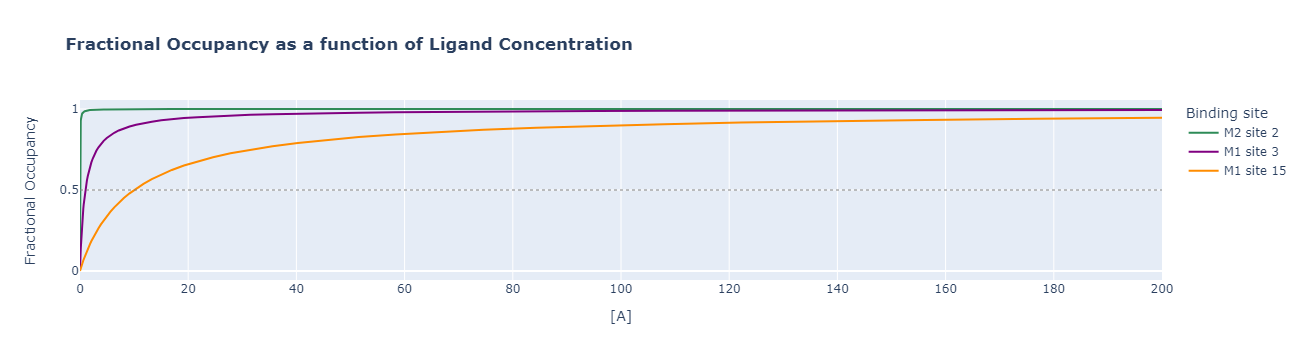

In [134]:
fig = px.line(data_frame=df, 
              x="[A]", y=["M2 site 2", "M1 site 3", "M1 site 15"],
              color_discrete_sequence = ["seagreen", "purple", "darkorange"],
              title="<b>Fractional Occupancy as a function of Ligand Concentration</b>",
              labels={"value":"Fractional Occupancy", "variable":"Binding site"})

fig.add_hline(y=0.5, line_width=1, line_dash="dot", line_color="gray")

fig.show()

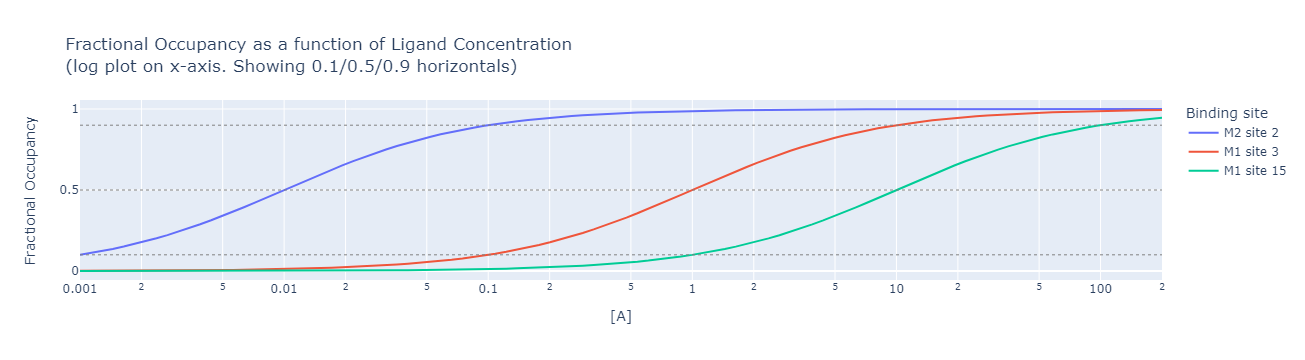

In [ ]:
fig = px.line(data_frame=df, 
                x="[A]", y=["M2 site 2", "M1 site 3", "M1 site 15"],
                log_x=True, range_x=[start,200],              
                title="Fractional Occupancy as a function of Ligand Concentration <br>(log plot on x-axis. Showing 0.1/0.5/0.9 horizontals)",
                labels={"value":"Fractional Occupancy", "variable":"Binding site"})

fig.add_hline(y=0.1, line_width=1, line_dash="dot", line_color="gray")
fig.add_hline(y=0.5, line_width=1, line_dash="dot", line_color="gray")
fig.add_hline(y=0.9, line_width=1, line_dash="dot", line_color="gray")

fig.show()